In [1]:
import sys, os
sys.path.append(os.path.abspath(
    os.getcwd()+"/core")
)

In [2]:
from core.neural_network import load_params
import matplotlib.pyplot as plt
from jax import nn
import jax.numpy as jnp

In [3]:
pml_probs = nn.softmax(load_params("data/PML-B-3.json")[1]["deformation_dist"], axis=0)
probs3 = nn.softmax(load_params("data/CNN-B-3.json")[1]["deformation_dist"], axis=0)
probs5 = nn.softmax(load_params("data/CNN-B-5.json")[1]["deformation_dist"], axis=0)
probs7 = nn.softmax(load_params("data/CNN-B-7.json")[1]["deformation_dist"], axis=0)
probs9 = nn.softmax(load_params("data/CNN-B-9.json")[1]["deformation_dist"], axis=0)
probability = [pml_probs, probs3, probs5, probs7, probs9]
namings = ["PML\nL=3", "CNN-G\nL=3", "CNN-G\nL=5", "CNN-G\nL=7", "CNN-G\nL=9"]

In [4]:
colors = [
    "#FFFFFF",  # I
    "#88C946",  # X <-> Y
    "#C43119",  # Y <-> Z
    "#00ADE7",  # X <-> Z
    "#833794",  # X -> Z -> Y -> X
    "#FFB94C",  # X -> Y -> Z -> X
]

/tmp/ipykernel_1421727/774895879.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["{:.0%}".format(i) for i in cbar.get_ticks()])


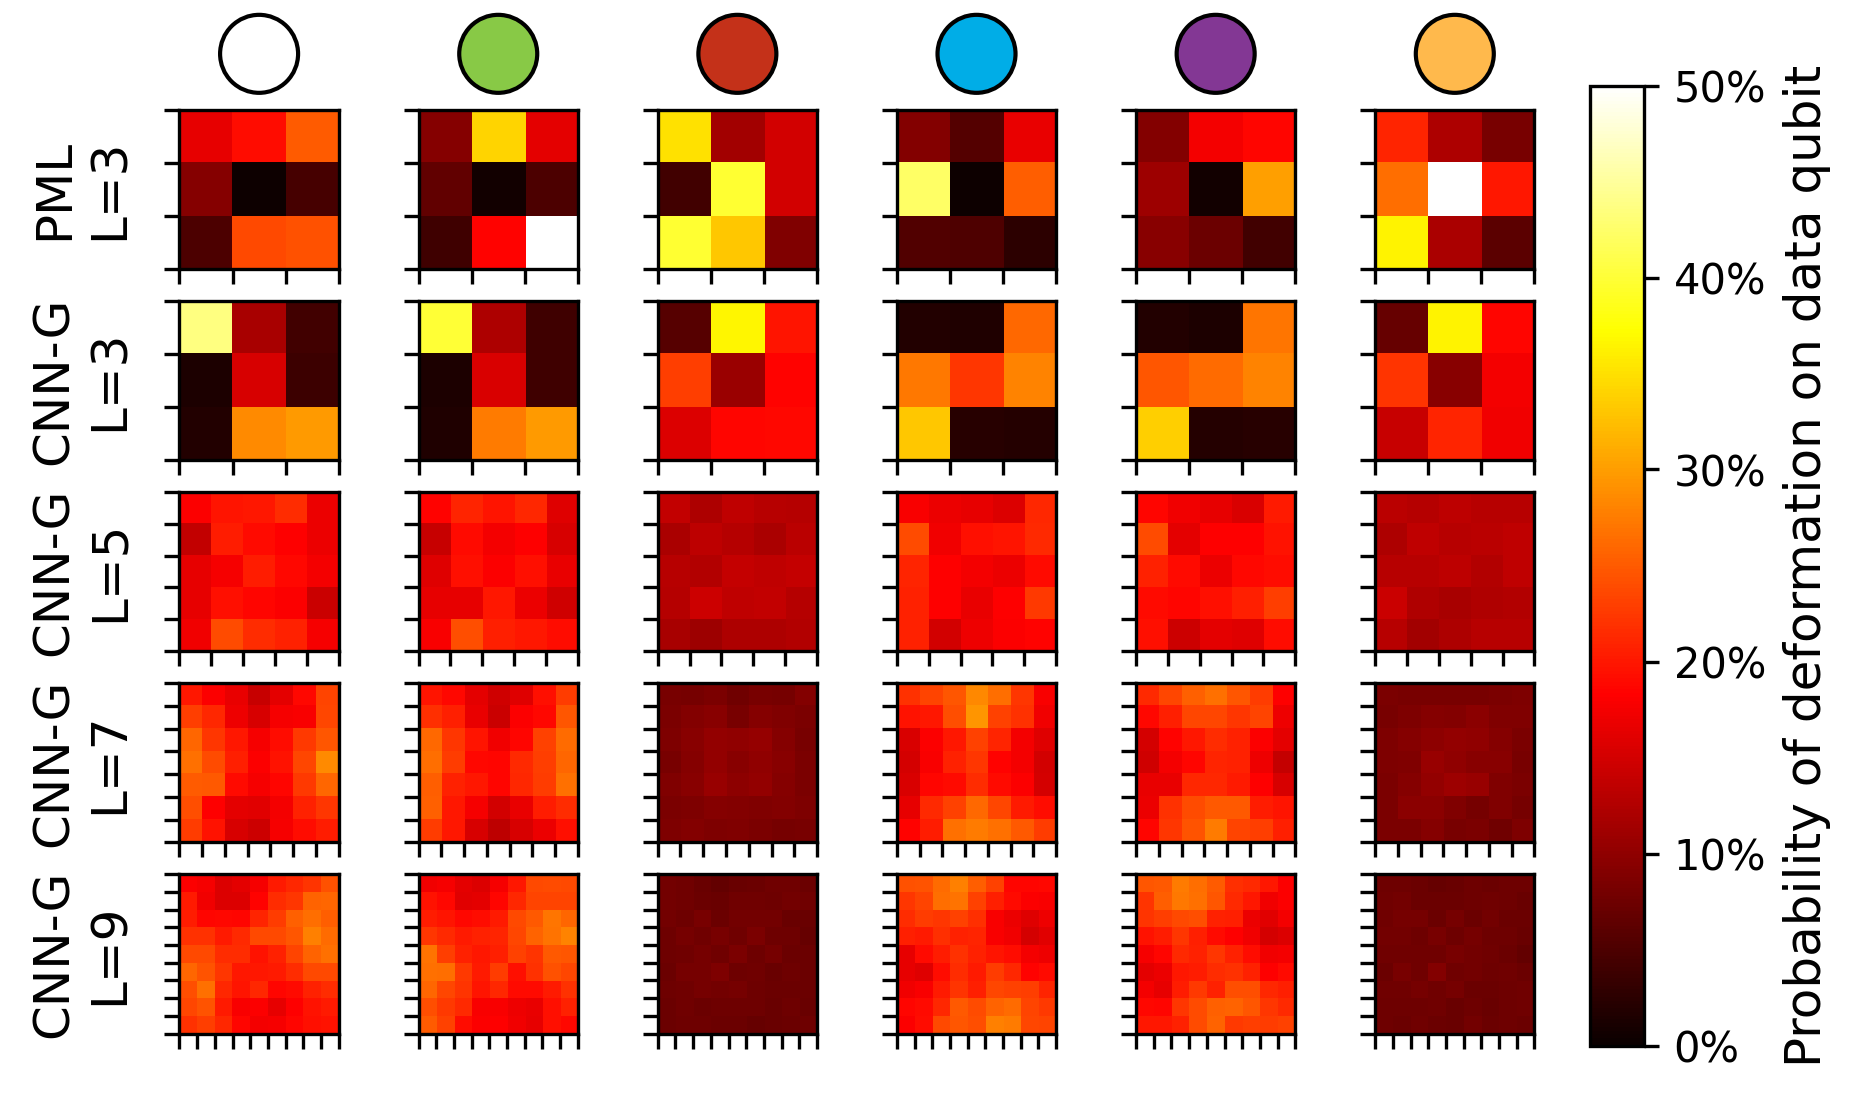

In [5]:
figure, axs = plt.subplots(len(probability), 6, figsize=(6, 4), dpi=300)
# figure.suptitle("Data qubit deformations", fontsize=16)
for i in range(len(probability)):
    for j in range(6):
        im = axs[i, j].imshow(
            probability[i][j], 
            cmap='hot', 
            interpolation='nearest', 
            vmin=0, 
            vmax=.5, 
            origin='lower')
        axs[i, j].set_xticks(jnp.arange(probability[i][j].shape[0]+1)-.5)
        axs[i, j].set_yticks(jnp.arange(probability[i][j].shape[1]+1)-.5)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        # axs[i, j].grid(visible=True, lw=.5)
        if i == 0:
            axs[i, j].set_title(
                " ", 
                fontsize=12, 
                color=colors[j], 
                fontweight="bold", 
                bbox=dict(boxstyle="circle", edgecolor="black", facecolor=colors[j]),
                pad=10  # Adjust the padding to lift the title up slightly
            )
        # if i == 3:
        #     axs[i, j].set_xlabel(f"D={j}", fontsize=12)
        if j == 0:
            axs[i, j].set_ylabel(namings[i], fontsize=12)
cax = figure.add_axes([0.92, 0.1, 0.03, 0.8])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label("Probability of deformation on data qubit", fontsize=12)
# cbar.ax.set_yticks(jnp.arange(0, 2/6, .03))
cbar.ax.set_yticklabels(["{:.0%}".format(i) for i in cbar.get_ticks()])

plt.savefig("figs/CNN-B-deformation_dist.eps", bbox_inches='tight', dpi=300)
plt.savefig("figs/CNN-B-deformation_dist.png", bbox_inches='tight', dpi=300)

plt.show()

In [6]:
from core.quantum_error_correction_code import SurfaceCode

for name, probs in zip(namings, probability):
    deformation = probs.argmax(axis=0).flatten()
    deformation = jnp.array([0,0,2,3,3,2])[deformation]
    L = probs.shape[1]
    display(name)
    code = SurfaceCode(L)
    parity_info = code.deformation_parity_info(deformation)
    print(code.show_latex_code(parity_info, deformation))

'PML\nL=3'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=BrickRed, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=BrickRed, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Cerulean, line width=.5mm, minimum size=5mm] (D3) at (0.0,2.0)

'CNN-G\nL=3'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (0,0) -- (0,2) -- (-1,1) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (4,4) -- (5,3) -- cycle;
\filldraw[fill=black!10, draw=none] (2,0) -- (4,0) -- (3,-1) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (1,5) -- cycle;

% Draw the data qubits
\node[draw, circle, fill=Cerulean, line width=.5mm, minimum size=5mm] (D0) at (0.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D1) at (2.0,0.0) {};
\node[draw, circle, fill=White, line width=.5mm, minimum size=5mm] (D2) at (4.0,0.0) {};
\node[draw, circle, fill=Cerulean, line width=.5mm, minimum size=5mm] (D3) at (0.0,2.0) {}

'CNN-G\nL=5'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!10, draw=none] (4,0) -- (6,0) -- (6,2) -- (4,2) -- cycle;
\filldraw[fill=black!5, draw=none] (4,2) -- (6,2) -- (6,4) -- (4,4) -- cycle;
\filldraw[fill=black!10, draw=none] (4,4) -- (6,4) -- (6,6) -- (4,6) -- cycle;
\filldraw[fill=black!5, draw=none] (4,6) -- (6,6) -- (6,8) -- (4,8) -- cycle;
\filldraw[fill=black!5, draw=none] (

'CNN-G\nL=7'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!10, draw=none] (0,8) -- (2,8) -- (2,10) -- (0,10) -- cycle;
\filldraw[fill=black!5, draw=none] (0,10) -- (2,10) -- (2,12) -- (0,12) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!5, draw=none] (2,8) -- (4,8) -- (4,10) -- (2,10) -- cycle;
\filldraw[fill=black!10, draw=none] (2,10) -- (4,10) -- (4,12) -- (2,12) -- cycle;
\filldraw[fill=black!10,

'CNN-G\nL=9'

% Draw the plaquettes
\filldraw[fill=black!10, draw=none] (0,0) -- (2,0) -- (2,2) -- (0,2) -- cycle;
\filldraw[fill=black!5, draw=none] (0,2) -- (2,2) -- (2,4) -- (0,4) -- cycle;
\filldraw[fill=black!10, draw=none] (0,4) -- (2,4) -- (2,6) -- (0,6) -- cycle;
\filldraw[fill=black!5, draw=none] (0,6) -- (2,6) -- (2,8) -- (0,8) -- cycle;
\filldraw[fill=black!10, draw=none] (0,8) -- (2,8) -- (2,10) -- (0,10) -- cycle;
\filldraw[fill=black!5, draw=none] (0,10) -- (2,10) -- (2,12) -- (0,12) -- cycle;
\filldraw[fill=black!10, draw=none] (0,12) -- (2,12) -- (2,14) -- (0,14) -- cycle;
\filldraw[fill=black!5, draw=none] (0,14) -- (2,14) -- (2,16) -- (0,16) -- cycle;
\filldraw[fill=black!5, draw=none] (2,0) -- (4,0) -- (4,2) -- (2,2) -- cycle;
\filldraw[fill=black!10, draw=none] (2,2) -- (4,2) -- (4,4) -- (2,4) -- cycle;
\filldraw[fill=black!5, draw=none] (2,4) -- (4,4) -- (4,6) -- (2,6) -- cycle;
\filldraw[fill=black!10, draw=none] (2,6) -- (4,6) -- (4,8) -- (2,8) -- cycle;
\filldraw[fill=black!5